In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
salary = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")

In [ ]:
salary.head()

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
drop_salary = salary.drop(columns=['...1', 'work_year', 'employment_type', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location'])
drop_salary.head()

,experience_level,job_title,salary_in_usd,company_size
0,MI,Data Scientist,79833,L
1,SE,Machine Learning Scientist,260000,S
2,SE,Big Data Engineer,109024,M
3,MI,Product Data Analyst,20000,S
4,SE,Machine Learning Engineer,150000,L


In [ ]:
drop_salary['job_title'].nunique()

49

# Part 1

<Axes: >

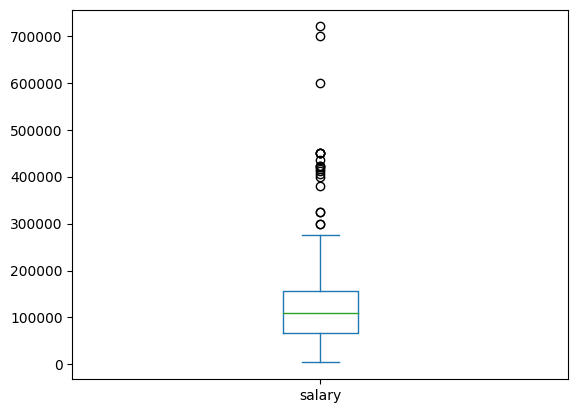

In [ ]:
salary["salary"].plot(kind = "box")

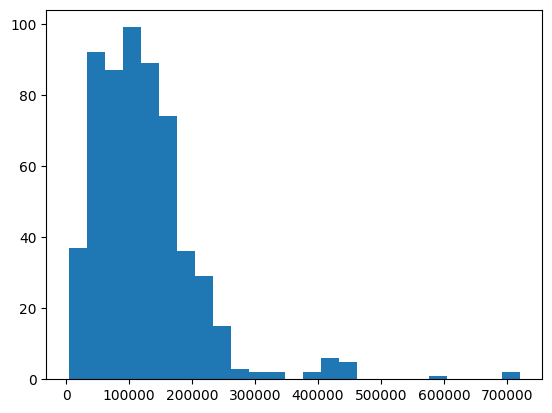

In [ ]:
plt.hist(salary["salary"], bins = 25)
plt.show()

In [ ]:
salary["salary"].describe()

,salary
count,581.000000
mean,123685.096386
std,85286.402256
min,4000.000000
25%,67000.000000
50%,110000.000000
75%,157000.000000
max,720000.000000


Most of the people salarys are below 200,000. It is unimodal, and right skewed.

# Part 2

<Figure size 800x600 with 0 Axes>

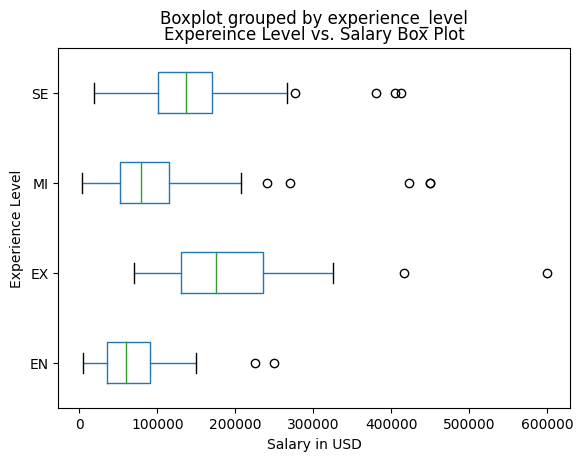

In [ ]:
plt.figure(figsize=(8,6))
drop_salary.boxplot(column='salary_in_usd', by = 'experience_level', vert = False, grid = False)
plt.title('Expereince Level vs. Salary Box Plot')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')
plt.show()

# Part 3

<Figure size 800x600 with 0 Axes>

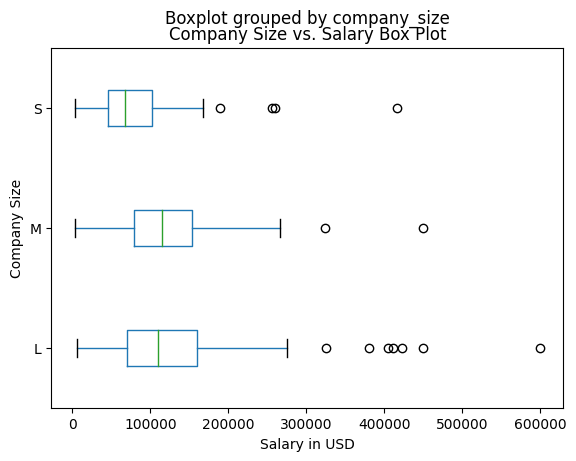

In [ ]:
plt.figure(figsize=(8,6))
drop_salary.boxplot(column='salary_in_usd', by = 'company_size', vert = False, grid = False)
plt.title('Company Size vs. Salary Box Plot')
plt.xlabel('Salary in USD')
plt.ylabel('Company Size')
plt.show()

In [ ]:
sm_co = salary.where(salary['company_size'] == 'S').dropna()
m_co = salary.where(salary['company_size'] == 'M').dropna()
l_co = salary.where(salary['company_size'] == 'L').dropna()

In [ ]:
sm_co['salary'].describe()

,salary
count,78.000000
mean,113011.935897
std,130881.707098
min,9272.000000
25%,48500.000000
50%,74500.000000
75%,120000.000000
max,720000.000000


In [ ]:
m_co['salary'].describe()

,salary
count,321.000000
mean,120767.398754
std,64107.614168
min,4000.000000
25%,80000.000000
50%,115934.000000
75%,155000.000000
max,450000.000000


In [ ]:
l_co['salary'].describe()

,salary
count,182.000000
mean,133405.357143
std,92713.230174
min,8000.000000
25%,69999.250000
50%,115000.000000
75%,170000.000000
max,600000.000000


# Part 4

In [ ]:
salary['job_title'].unique() #We want to distinguish between Analyst and Engineer

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Science Consultant', 'Data Engineer', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [ ]:
analyst_job_titles = [job_title for job_title in salary['job_title'] if 'Analyst' in job_title]
engineer_job_titles = [job_title for job_title in salary['job_title'] if 'Engineer' in job_title]
analyst_job_titles[:10]

['Product Data Analyst',
 'Data Analyst',
 'Business Data Analyst',
 'Lead Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Product Data Analyst',
 'BI Data Analyst',
 'Business Data Analyst',
 'Data Analyst']

In [ ]:
analyst_df = salary[salary['job_title'].isin(analyst_job_titles)]
engineer_df = salary[salary['job_title'].isin(engineer_job_titles)]
engineer_df.sample(5)

,...1,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
495,521,2022,EN,FT,Computer Vision Engineer,10000,USD,10000,PT,100,LU,M
455,481,2022,SE,FT,Machine Learning Engineer,65000,USD,65000,AE,100,AE,S
101,107,2021,SE,FT,Data Engineer,115000,USD,115000,US,100,US,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
539,565,2022,SE,FT,Data Engineer,54000,USD,54000,US,0,US,M


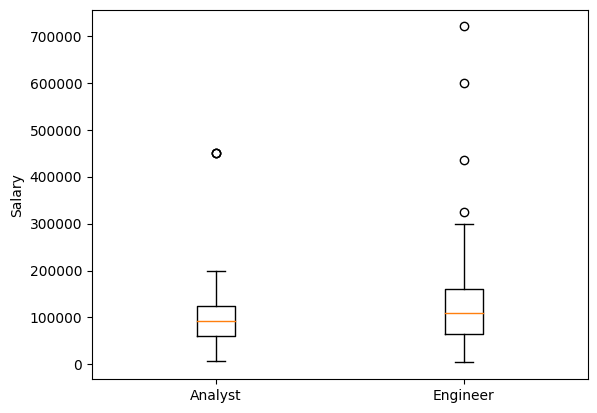

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([analyst_df['salary'], engineer_df['salary']], positions=[0, 1])
ax.set_xticklabels(['Analyst', 'Engineer'])
ax.set_ylabel('Salary')
plt.show()

# Part 5

In [ ]:
pd.crosstab(salary['job_title'], salary["experience_level"], normalize = "index").head(4)


experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,0.0,0.0,1.000000,0.000000
AI Scientist,0.5,0.0,0.333333,0.166667
Analytics Engineer,0.0,0.5,0.000000,0.500000
Applied Data Scientist,0.2,0.0,0.400000,0.400000


In [ ]:
pd.crosstab(salary['company_size'], salary["experience_level"], normalize = "index").head(4)


experience_level,EN,EX,MI,SE
company_size,,,,
L,0.142857,0.054945,0.434066,0.368132
M,0.084112,0.037383,0.299065,0.579439
S,0.346154,0.038462,0.333333,0.282051


In [ ]:
pd.crosstab(salary['company_size'], salary["job_title"], normalize = "index").head(4)

job_title,3D Computer Vision Researcher,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,BI Data Analyst,Big Data Architect,Big Data Engineer,Business Data Analyst,Cloud Data Engineer,...,Machine Learning Manager,Machine Learning Scientist,Marketing Data Analyst,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist
company_size,,,,,,,,,,,,,,,,,,,,,
L,0.000000,0.010989,0.000000,0.027473,0.010989,0.005495,0.000000,0.010989,0.021978,0.005495,...,0.005495,0.021978,0.005495,0.005495,0.000000,0.010989,0.016484,0.005495,0.060440,0.000000
M,0.003115,0.006231,0.012461,0.000000,0.006231,0.006231,0.003115,0.006231,0.000000,0.000000,...,0.000000,0.006231,0.000000,0.000000,0.003115,0.003115,0.009346,0.000000,0.009346,0.003115
S,0.000000,0.025641,0.000000,0.000000,0.000000,0.025641,0.000000,0.025641,0.000000,0.012821,...,0.000000,0.025641,0.000000,0.000000,0.012821,0.000000,0.012821,0.012821,0.025641,0.000000


# Part 6

From Part 1 of the project we found that the distribution is Unimodal. From Part 2 generally in the data set, people with more experience have a higher range of salary than those with less experience in the data set. Experts, have the highest average salary. From Part 3 Generally smaller companies have lower salaries. The medium size companies and large companies have around the same average salary, but the larger companies have about half the amount of representation and more outliers in the higher ranges of salary. From Part 4 it was found that Analyst have close to the same average salary as Engineers, however Engineers have a higher pay ceiling. From Part 5 we learned that 3D Computer Vision researches are generally more experinece, while other jobs are a range of experience. Company size does not appear to have an effect on overall job experience of employees within a company.